In [1]:
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=5.0, repr.plot.height=4.0, repr.plot.res=300)

In [2]:
library(ggplot2)
library(ggthemes)

In [3]:
df = read.csv("/lfs/scratch/althoff/plot_data/simulation_results_gini_obesity_diff_strategies_20170223.csv") 

In [4]:
# Sorting
countries_must_label = c("Japan", "United Kingdom", "United States", "Saudi Arabia")
df$must_label_ind = (df$Country %in% countries_must_label)
sorted_df = df[order(-df$must_label_ind, -df$Reduction.in.obesity.prevalence), ]

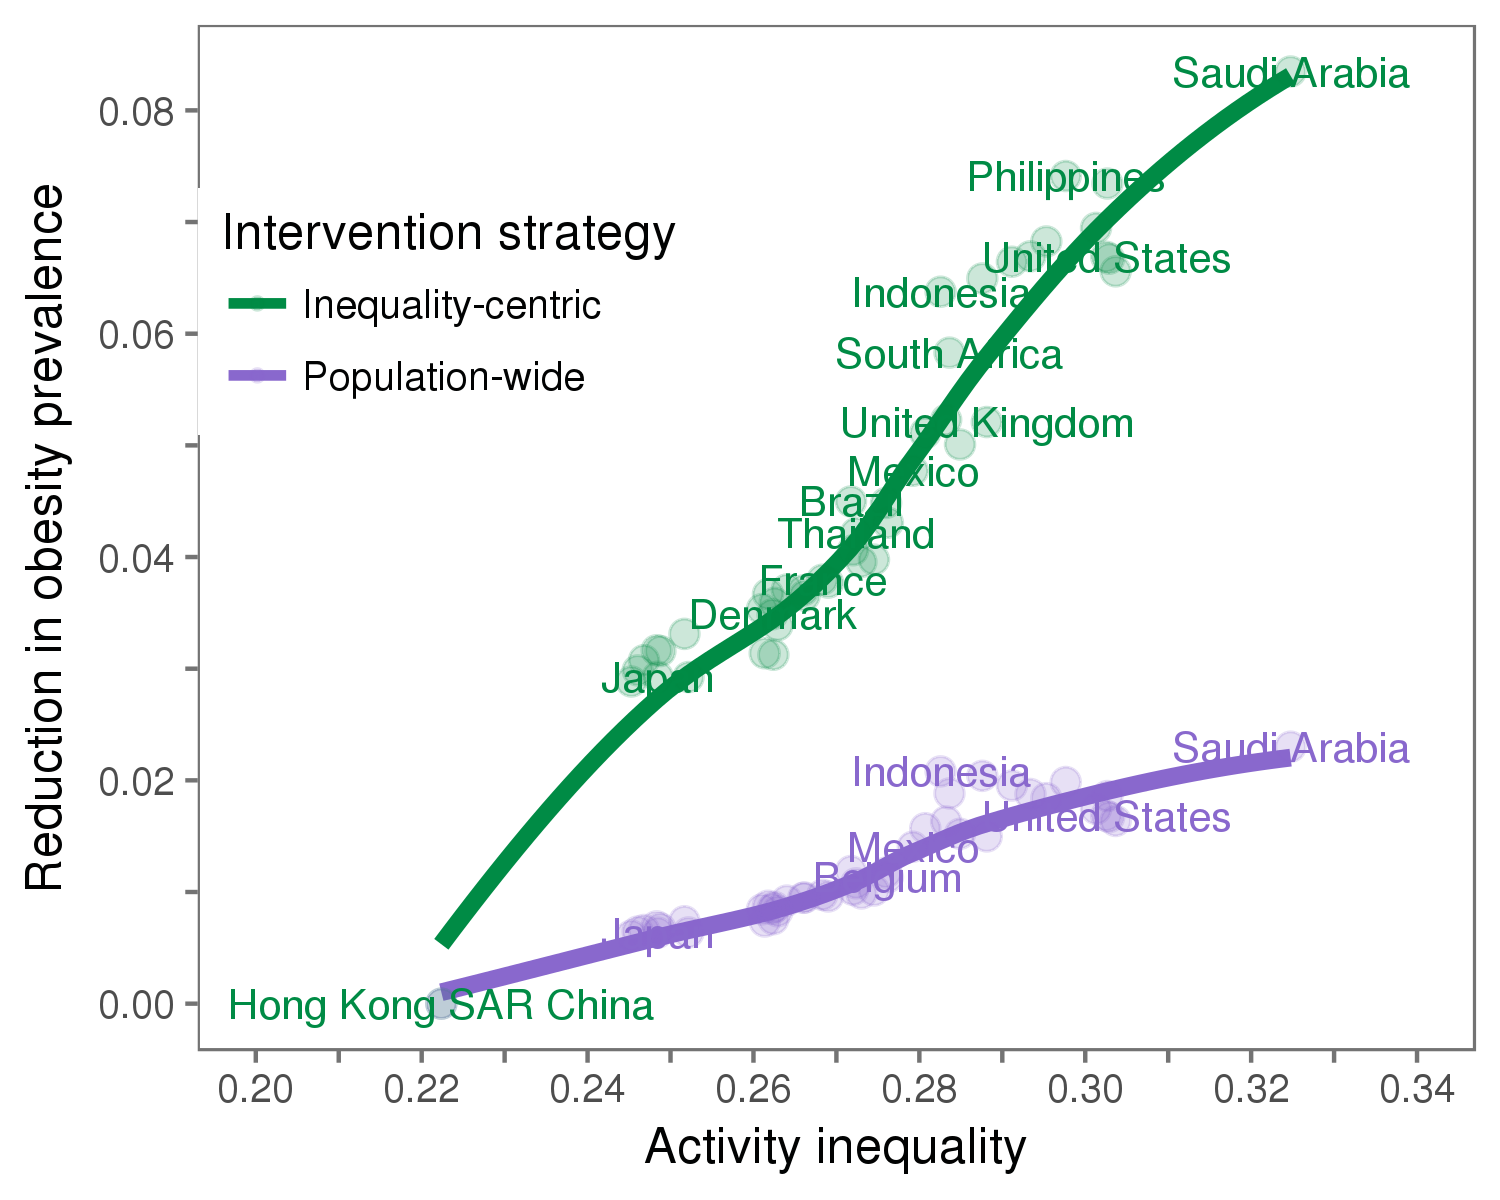

In [5]:
p <- ggplot(sorted_df, aes(Activity.inequality, Reduction.in.obesity.prevalence, label=Country, color=Intervention.strategy))
p <- p + geom_smooth(method="loess",span=.9,  se = F, size=2.0,alpha=1.0, method.args=list(family="symmetric"))
p <- p + geom_point(alpha=.2, size=3.0)
p <- p + geom_text(check_overlap = T, size=3.5)
p <- p + xlab("Activity inequality") + ylab("Reduction in obesity prevalence")
p <- p + guides(color=FALSE) + guides(size=FALSE)
p <- p + theme_few(base_size=12, base_family="Helvetica")
p <- p + scale_color_manual(values=c("springgreen4", "mediumpurple3"), name="Intervention strategy")
p <- p + theme(legend.justification=c(0,0), legend.position=c(.0,.60))

# xticks
ticks = seq(.20,.34,by=0.01) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 2)] = sprintf("%.2f", ticks[seq(1, length(labels), 2)])
p <- p + scale_x_continuous(breaks=ticks, labels=labels, limits=c(.20, .34))
# yticks
ticks = seq(.0, .10,by=0.01) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 2)] = sprintf("%.2f", ticks[seq(1, length(labels), 2)])
p <- p + scale_y_continuous(breaks=ticks, labels=labels) #, limits=c(18, 100))
p <- p + guides(color = guide_legend(override.aes = list(size=1.2)))

p

ggsave(filename="../output/edfig10.pdf", plot=p, width=5, height=3)